In [1]:
import json
import os
import pandas as pd
import numpy as np
from enum import Enum
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from IPython.display import display, HTML

In [2]:
#The primary function for processing the Json data in each file. 
#Input:A dictionary made from the Jsonfile. 
#Return: PandasTable to be added to the combined table.
def load_table(json_dict):
    
    #If the assay status is 'Error', skip it entirely.
    try:
        errortest = json_dict['QuantitativeResponseAssay']['Status']['Overall'] == 'ERROR'
        if (errortest):
            return None
        #If anything fails at this stage, skip it aswell.
        key=json_dict['QuantitativeResponseAssay']['Meta']['Template']['Key']
        date=pd.to_datetime(json_dict['QuantitativeResponseAssay']['Meta']["Creation"]["Time"][:10])
        results = json_dict['QuantitativeResponseAssay']['AssayResults']
    except (KeyError,TypeError):
            return None
    
  
    validelementnames = ["Position P0","Position P1", "Position P2", "Position P3","Position P4","Position P5","Position P6"]
    
    
    
    #Initiate the table to be returned.
    newrows={'Template key':[], 'Dato' :[], 'Position':[], 'a':[],'b':[],'c':[],'d':[],'weight':[]}
    dfnew = pd.DataFrame(newrows)    
    for validelement in validelementnames:
        newrow={'Template key':[key], 'Dato' :[date], 'Position':[validelement], 'a':[np.NAN],'b':[np.NAN],'c':[np.NAN],'d':[np.NAN],'weight':[np.NAN]}
        dfrow = pd.DataFrame(newrow)
        dfnew = pd.concat([dfnew,dfrow], ignore_index=True)
        
    

    #Iterate over the results to fill the table. 
    for result in results:
        try:
            Positiontindex = validelementnames.index(results[result]['StatisticTestResults']['StatisticTestResult[3]']['InvolvedAssayElements']['Name'])
            weightvalue = float(results[result]['StatisticTestResults']['StatisticTestResult[3]']['Value'])
            dfnew.at[Positiontindex,'weight'] = weightvalue
            fit = results[result]['FullModel']['FitResult']
            for estimate in fit:
                if fit[estimate]['AssayElementName'] in validelementnames:
                    dfnew.at[Positiontindex,fit[estimate]['ParameterName'].lower()] = fit[estimate]['Value']
        except (KeyError,TypeError,ValueError):
            #If anything fails, it means the current result object is without relevance.
            pass
    
    #Any rows that are not completely filled up by this stage gets dropped.
    dfnew = dfnew.dropna()
    
    return dfnew


In [3]:
table = {'Template key':[], 'Dato' :[], 'Position':[], 'a':[],'b':[],'c':[],'d':[],'weight':[]}
#The below pandas table is what is to be populated with the JSON data.
tableframe = pd.DataFrame(table)

# For each JSON File in each directory in Data, apply the load_table function and assemple it all in the Tableframe
script_dir = os.path.abspath('')
dirpath = os.path.join(script_dir, ".\\Data")
for dirs in os.listdir(dirpath):
    concatdir = dirpath + "\\"+dirs
    innerlist = os.listdir(concatdir)
    for file in innerlist:
        if(file[-5:] == ".json"):
            filepath = concatdir + "\\" + file
            with open(filepath, 'r') as f:
                #Pre-processing, to ensure file complies with Pythons Json intepretor.
                filedata = f.read()
                filedata = filedata.replace('INF','Infinity')
                filedata = filedata.replace('\n','')
                
                #Have the json library convert the filedata to a Python dictionary
                data = json.loads(filedata)
                new_table= load_table(data)
                if (new_table is not None):
                    tableframe = pd.concat([tableframe,new_table], ignore_index=True)

In [4]:
display(HTML(tableframe.to_html()))

,Template key,Dato,Position,a,b,c,d,weight
0,Template-1629,2019-12-06,Position P0,5.040806,1.178846,2.031909,4.033316,6.108629e+02
1,Template-1629,2019-12-06,Position P1,5.065447,1.153575,2.095908,4.073134,7.390607e+02
2,Template-1629,2019-12-06,Position P2,5.025145,1.320192,2.033614,4.041455,5.737538e+02
3,Template-1629,2019-12-06,Position P3,5.018075,1.271213,2.033794,4.039728,5.881311e+02
4,Template-1629,2019-12-06,Position P0,5.044792,1.339280,2.058639,4.089073,8.019067e+02
5,Template-1629,2019-12-06,Position P1,5.084173,1.136797,2.024434,4.062963,1.150943e+03
6,Template-1629,2019-12-06,Position P2,5.087836,1.201832,2.060489,4.059065,8.872245e+02
7,Template-1629,2019-12-06,Position P3,5.048115,1.347414,2.054237,4.074366,7.974217e+02
8,Template-1629,2019-12-06,Position P0,5.037204,1.194822,1.997732,4.003776,4.806413e+02
9,Template-1629,2019-12-06,Position P1,5.033943,1.380259,2.075789,4.071206,5.791606e+02


In [5]:
#Function to make a scatterplot for a given parameter.
#Input: A dataframe and a parameter given as a string.
def plot_table(df,parameter):
    mean = df[parameter].mean()
    std = df[parameter].std()
    ax = df.plot(kind= 'scatter', x='Dato',y=parameter)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
    plt.axhline(y=mean, color = 'r',linestyle = '-')
    plt.axhline(y=mean+std, color = 'b',linestyle = '-')
    plt.axhline(y=mean-std, color = 'b',linestyle = '-')
    plt.show()

In [6]:
#Define the dataframes for each position.
df0 = tableframe[tableframe['Position']=='Position P0']
df1 = tableframe[tableframe['Position']=='Position P1']
df2 = tableframe[tableframe['Position']=='Position P2']
df3 = tableframe[tableframe['Position']=='Position P3']
df4 = tableframe[tableframe['Position']=='Position P4']
df5 = tableframe[tableframe['Position']=='Position P5']
df6 = tableframe[tableframe['Position']=='Position P6']

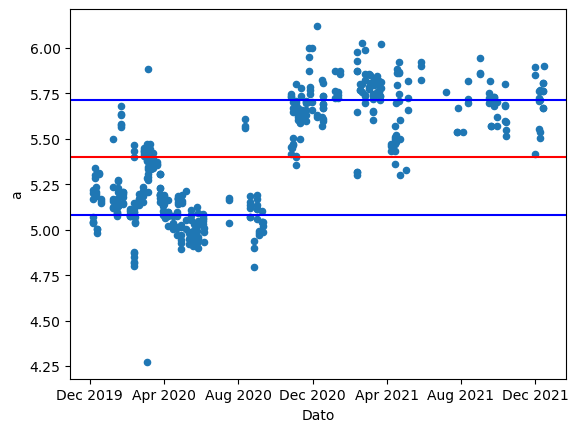

In [7]:
plot_table(df0,'a')

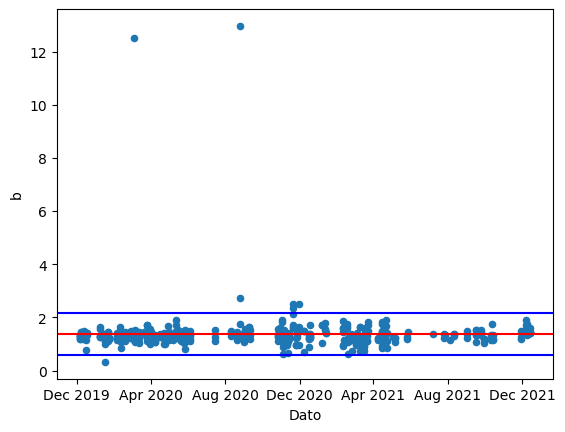

In [8]:
plot_table(df0,'b')

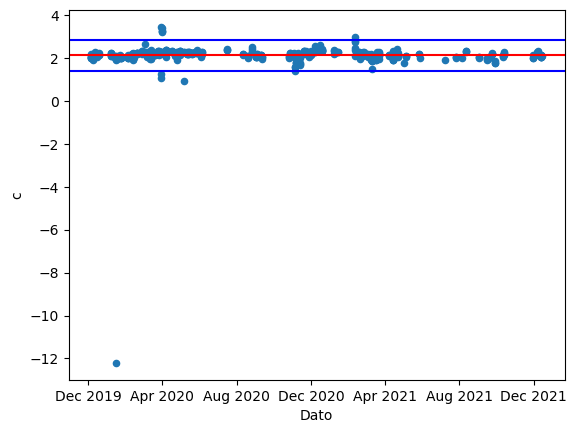

In [9]:
plot_table(df0,'c')

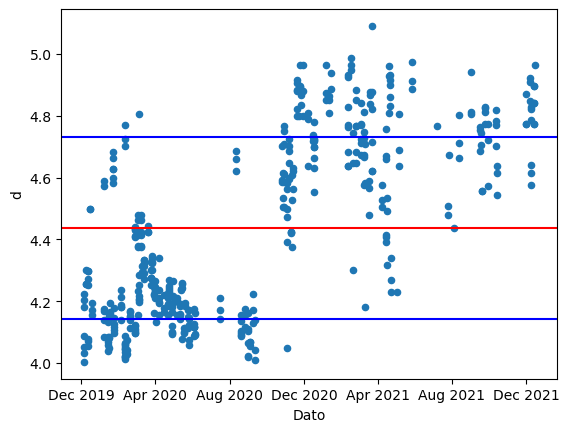

In [10]:
plot_table(df0,'d')

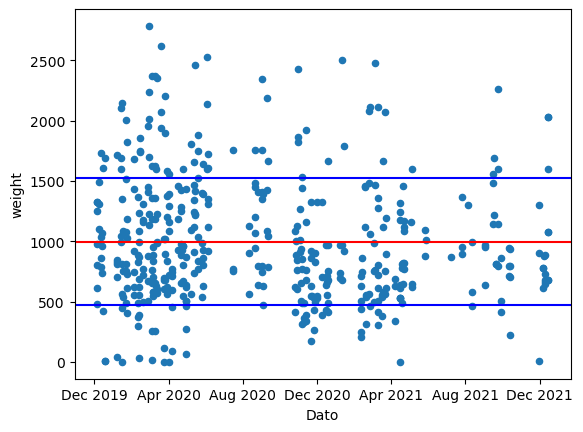

In [11]:
plot_table(df0,'weight')

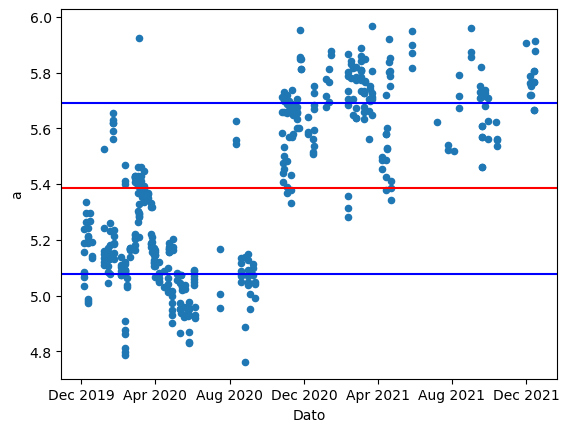

In [12]:
plot_table(df1,'a')

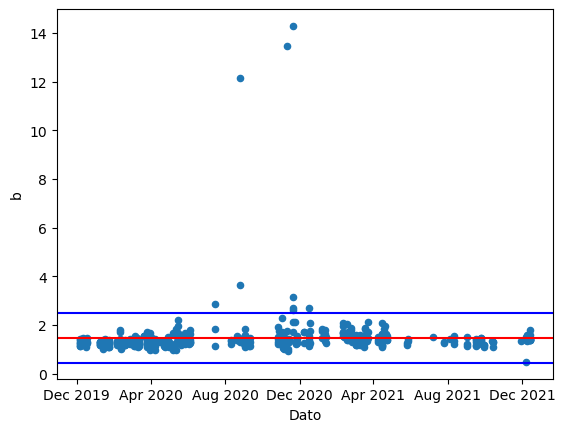

In [13]:
plot_table(df1,'b')

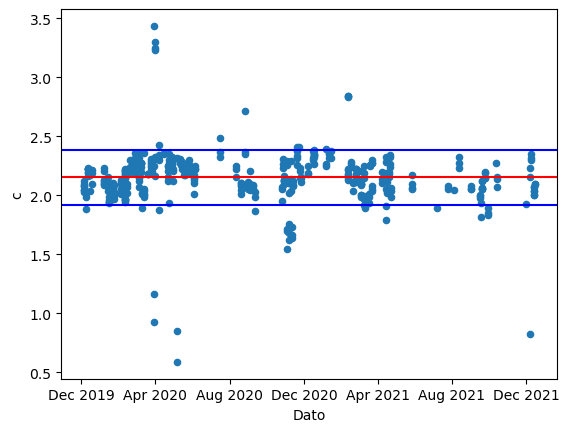

In [14]:
plot_table(df1,'c')

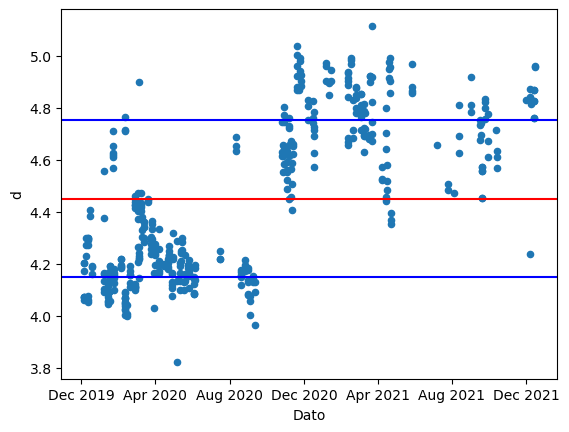

In [15]:
plot_table(df1,'d')

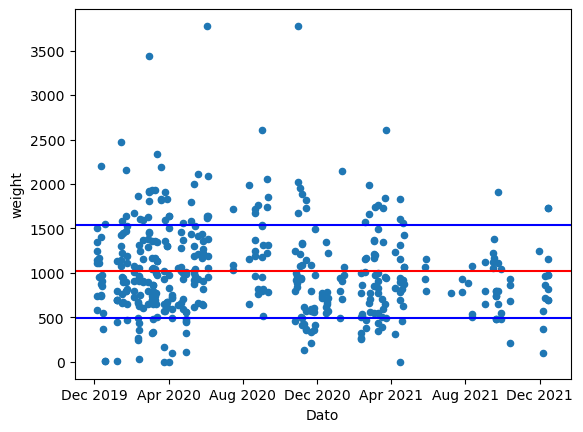

In [16]:
plot_table(df1,'weight')

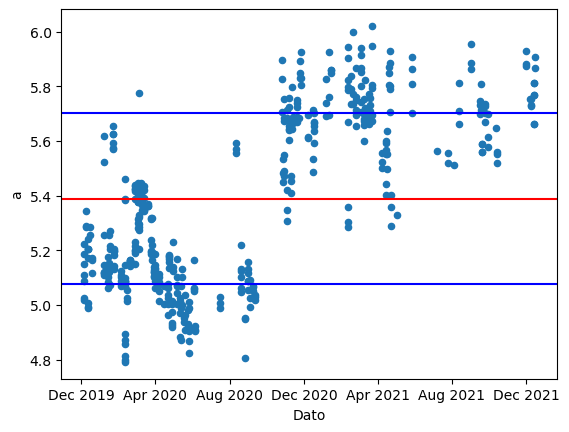

In [17]:
plot_table(df2,'a')

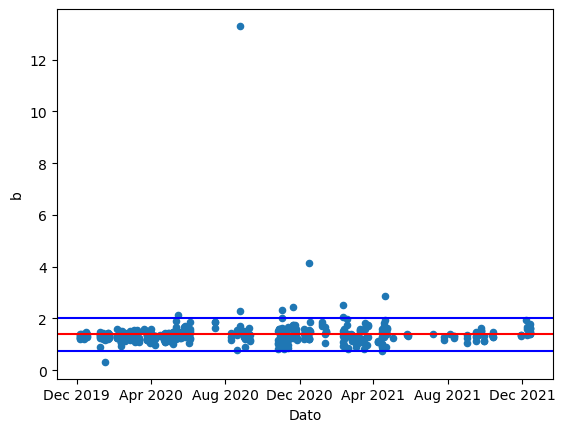

In [18]:
plot_table(df2,'b')

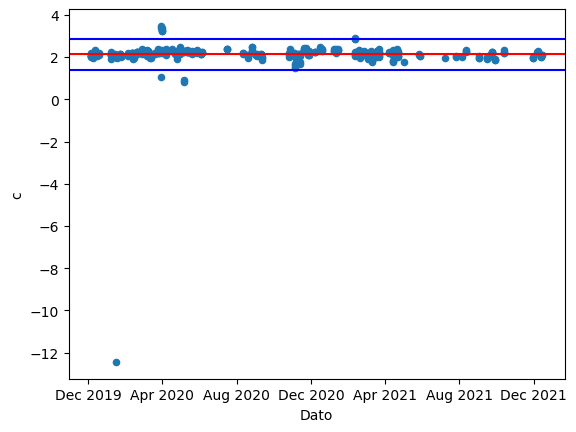

In [19]:
plot_table(df2,'c')

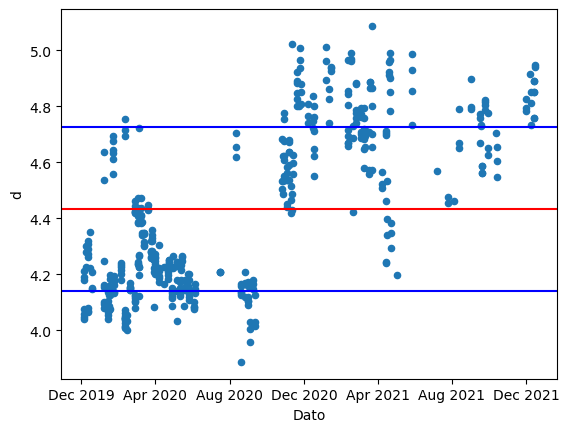

In [20]:
plot_table(df2,'d')

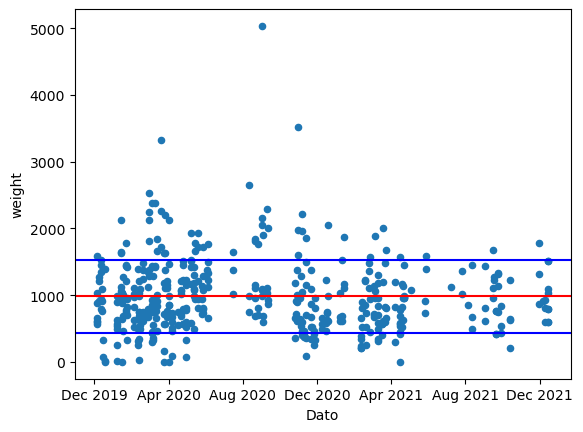

In [21]:
plot_table(df2,'weight')

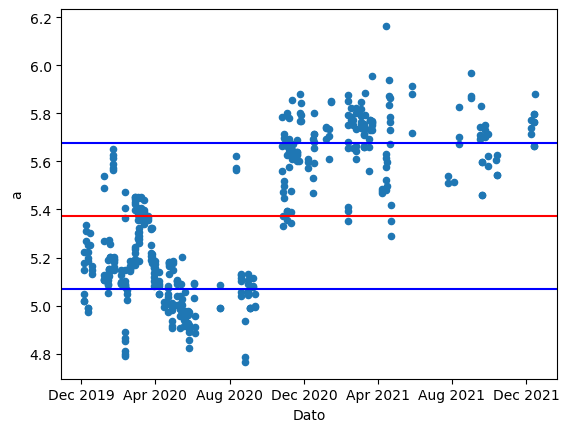

In [22]:
plot_table(df3,'a')

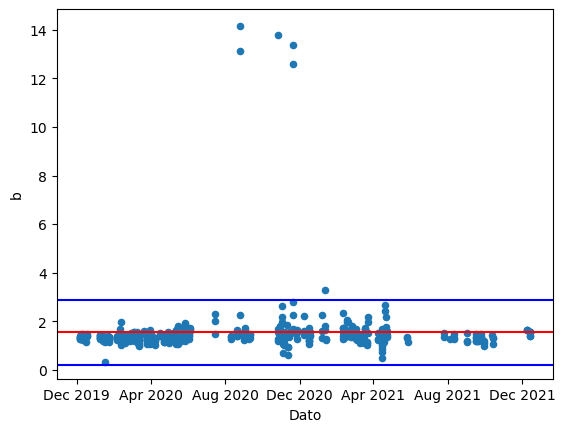

In [23]:
plot_table(df3,'b')

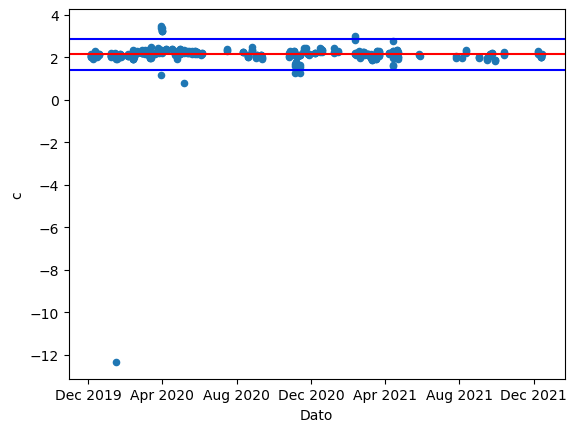

In [24]:
plot_table(df3,'c')

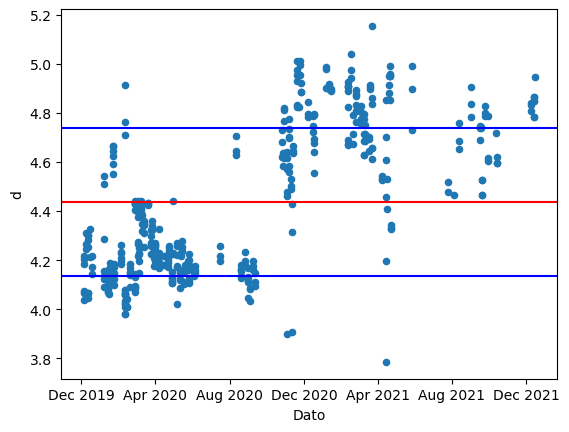

In [25]:
plot_table(df3,'d')

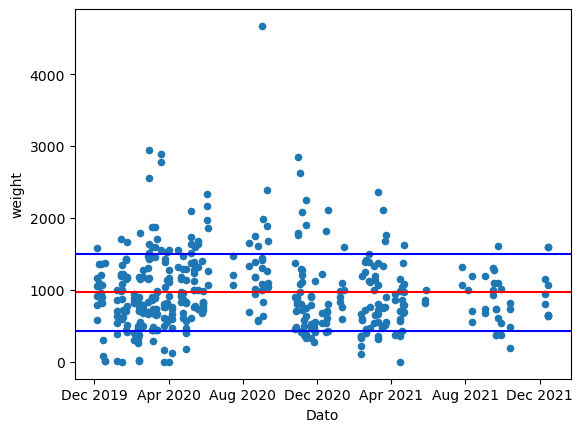

In [26]:
plot_table(df3,'weight')

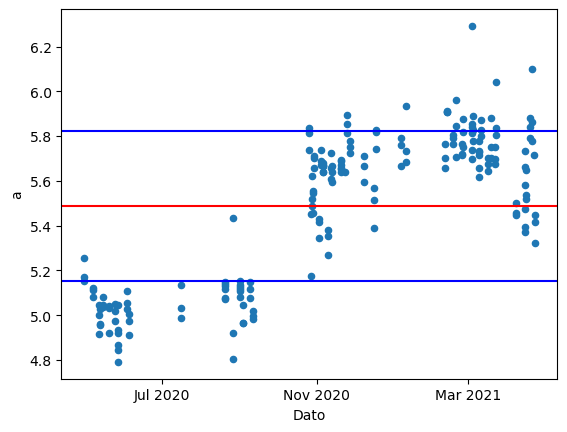

In [27]:
plot_table(df4,'a')

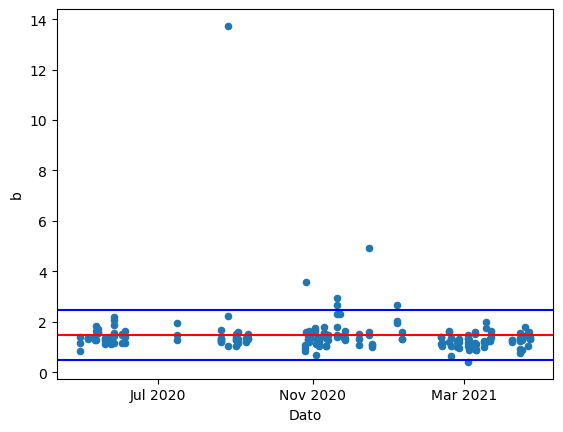

In [28]:
plot_table(df4,'b')

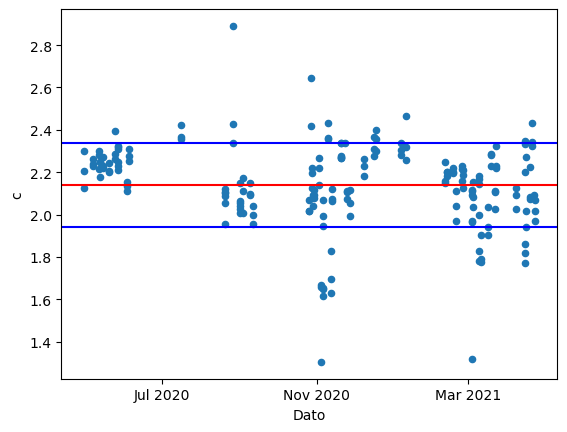

In [29]:
plot_table(df4,'c')

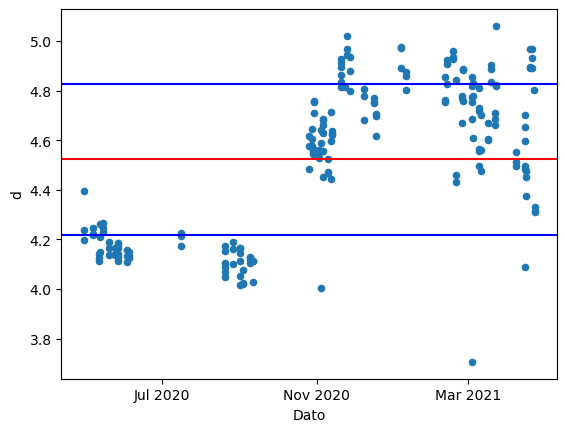

In [30]:
plot_table(df4,'d')

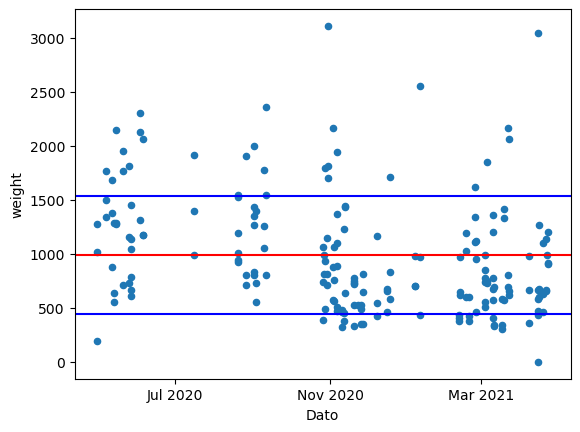

In [31]:
plot_table(df4,'weight')

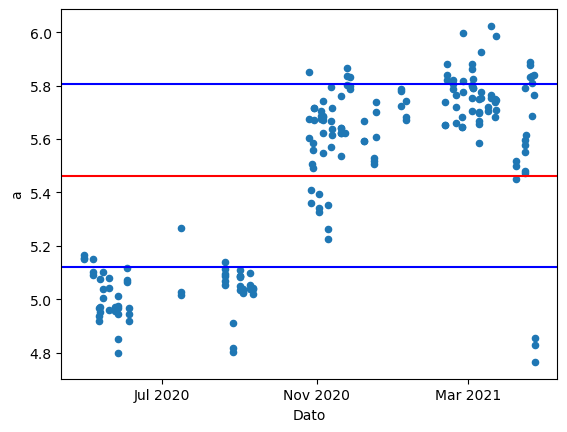

In [32]:
plot_table(df5,'a')

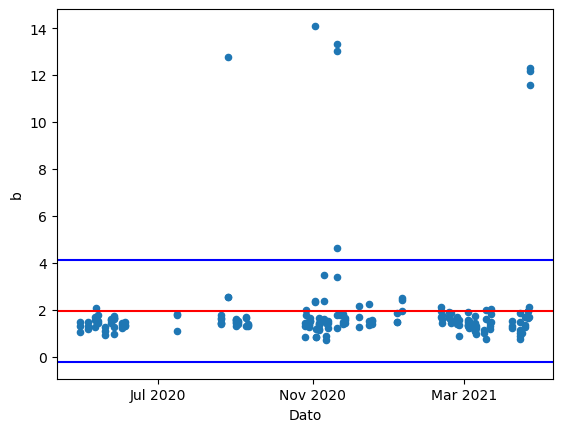

In [33]:
plot_table(df5,'b')

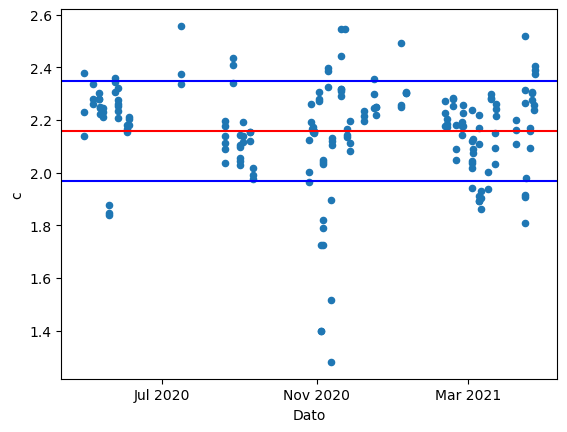

In [34]:
plot_table(df5,'c')

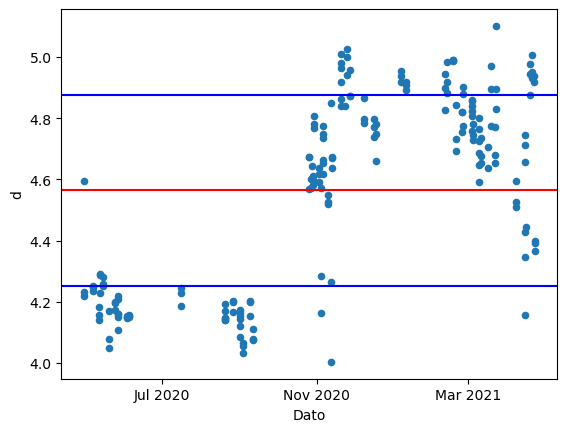

In [35]:
plot_table(df5,'d')

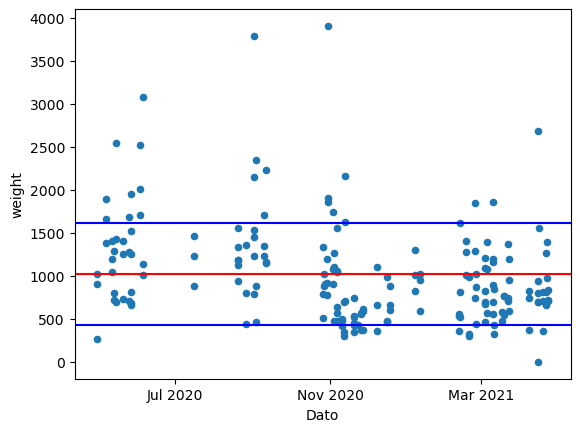

In [36]:
plot_table(df5,'weight')

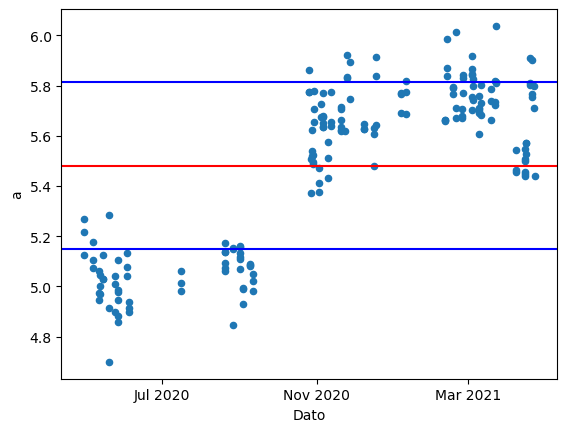

In [37]:
plot_table(df6,'a')

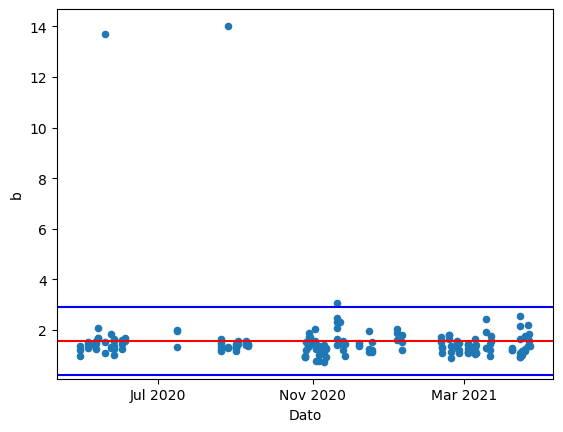

In [38]:
plot_table(df6,'b')

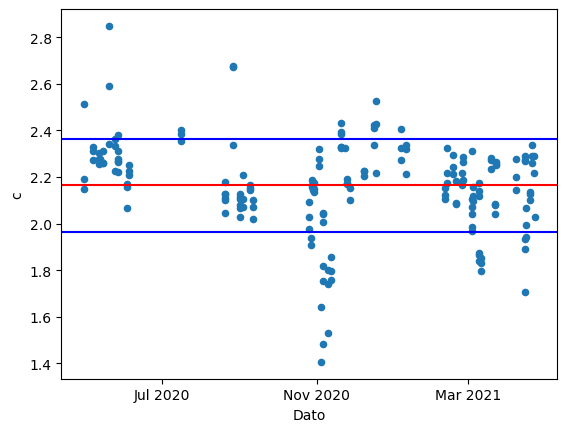

In [39]:
plot_table(df6,'c')

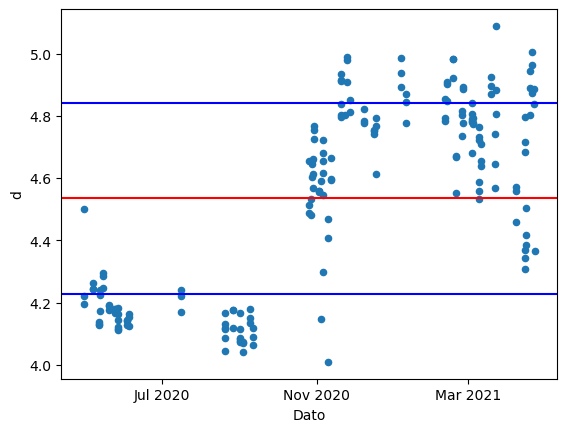

In [40]:
plot_table(df6,'d')

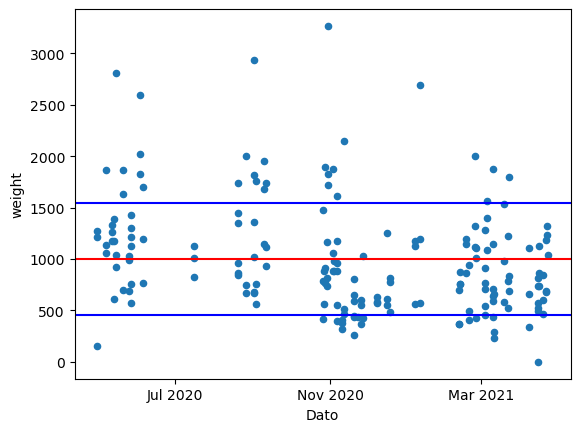

In [41]:
plot_table(df6,'weight')